<a href="https://colab.research.google.com/github/vladimiralencar/DeepLearning-LANA/blob/master/MLP/02_Multilayer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayer Perceptron

### Implementação com TensorFlow 

http://yann.lecun.com/exdb/mnist/

## Leitura  dos dados

In [11]:
from google.colab import files
files.upload()

Saving t10k-images-idx3-ubyte.gz to t10k-images-idx3-ubyte (1).gz
Saving t10k-labels-idx1-ubyte.gz to t10k-labels-idx1-ubyte (1).gz
Saving train-images-idx3-ubyte.gz to train-images-idx3-ubyte (1).gz
Saving train-labels-idx1-ubyte.gz to train-labels-idx1-ubyte (1).gz
Saving Arquitetura-MNIST.png to Arquitetura-MNIST (1).png
Saving mnist-sample.png to mnist-sample (1).png


In [0]:
# listar os arquivos da pasta corrente
#import os
#items = os.listdir('/content')
#[print(item) for item in items ]

## Compreendendo o Dataset

MNIST é um dataset que contém 70.000 imagens rotuladas de dígitos escritos à mão, conforme imagem abaixo.

![MNIST Data Sample](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/images/mnist-sample.png?raw=true  "MNIST Data Sample")

Nós vamos treinar um classificador linear em uma parte desse conjunto de dados e depois testar o classificador contra outra parte do conjunto de dados para avaliar a performance do nosso modelo. Para isso usaremos um modelo Multilayer Perceptron.

In [0]:
##########################
### Importando os Módulos
##########################
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.cmap'] = 'Greys'

In [16]:
##########################
### DATASET
##########################
#file = "/media/datasets/DeepLearningI/Cap04/MNIST"
mnist = input_data.read_data_sets("MNIST", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models

Esse procedimento já divide o conjunto de dados em três partes:

* Dataset de treino (55000 exemplos) usado para treinar o modelo
* Dataset de validação (5000 exemplos) usado para otimizar os hiperparâmetros 
* Dataset de test (10000 exemplos) usado para avaliar a precisão do modelo treinado

As imagens estão em escala de cinza e cada uma tem dimensão de 28 pixels de largura por 28 pixels de altura sendo armazenada em uma matriz de comprimento 784.

Os rótulos (labels) são um vetor * one hot * de comprimento 10, o que significa que é um vetor preenchido com zeros, exceto no local que corresponde ao rótulo a que se refere. Por exemplo. Uma imagem com label `3` será representada como `(0, 0, 0, 1, 0, 0, 0, 0, 0, 0)`.


In [17]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape) 

(55000, 784)
(55000, 10)


In [18]:
print (mnist.validation.images.shape)
print (mnist.validation.labels.shape) 

(5000, 784)
(5000, 10)


In [19]:
print (mnist.test.images.shape)
print (mnist.test.labels.shape)

(10000, 784)
(10000, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


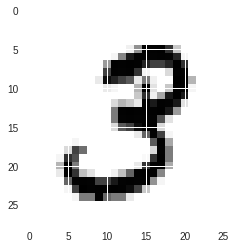

In [20]:
##########################
### Visualizando os Dados
##########################
example_image = mnist.train.images[1]
example_image_reshaped = example_image.reshape((28, 28)) 
example_label = mnist.train.labels[1]

print (example_label)
plt.imshow(example_image_reshaped)

In [0]:
import numpy as np
import pandas as pd

In [22]:
np.count_nonzero(example_image)

172

In [28]:
a = example_image
unique, counts = np.unique(a, return_counts=True)
df = pd.DataFrame({'value': unique, 'ocur':counts, })
df.sort_values('ocur', ascending=False)

,ocur,value
0,612,0.000000
41,31,0.992157
40,16,0.988235
42,14,0.996078
30,11,0.796079
22,7,0.592157
2,7,0.078431
37,6,0.913726
12,5,0.321569
32,5,0.835294


In [29]:
df.ocur.sum()

784

## Arquitetura da Rede

Agora que compreendemos melhor o conjunto de dados com o qual estamos trabalhando, vamos passar para os bits de aprendizado da máquina.

![Neural network 1 hidden layer](https://github.com/vladimiralencar/DeepLearning-LANA/blob/master/images/Arquitetura-MNIST.png?raw=true "Neural network with 1 hidden layer")

In [0]:
##########################
### Configurações
##########################

# Hiperparâmetros
learning_rate = 0.1 # tamanho da passada
training_epochs = 10
batch_size = 64

# Arquitetura
n_hidden_1 = 128
n_hidden_2 = 256
n_input = 784
n_classes = 10

## Definindo o Grafo Computacional

Primeiro, configuramos alguns espaços reservados (placeholders) para armazenar lotes desses dados de treinamento para quando treinarmos nosso modelo. A razão pela qual trabalhamos em lotes é que é mais fácil carregar na memória do que usar todo o conjunto. E é essa noção de trabalhar com lotes (aleatórios) de entrada ao invés de todo o conjunto que nos move do domínio de * Gradient Descent * que vimos anteriormente, para * Stochastic Gradient Descent * que temos aqui. Depois criamos as camadas, a função de perda e como vamos calcular as previsões.

Definiremos a inicialização de pesos e bias da seguinte forma:

````
W1 = tf.Variable(tf.zeros([784, 100]))
b1 = tf.Variable(tf.zeros([100]))
W2 = tf.Variable(tf.zeros([100, 10]))
b2 = tf.Variable(tf.zeros([10]))

````

Definimos também a nossa função de perda para medir a performance do modelo em imagens com rótulos conhecidos. Usamos a forma específica chamada de[cross entropy loss]

In [0]:
##########################
### Definição do Grafo no TensorFlow
##########################

g = tf.Graph()
with g.as_default():

    # Input data
    tf_x = tf.placeholder(tf.float32, [None, n_input], name = 'features')
    tf_y = tf.placeholder(tf.float32, [None, n_classes], name = 'targets')

    # Parâmetros do Modelo
    weights = {
        'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1], stddev = 0.1)),
        'w2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
        'out': tf.Variable(tf.truncated_normal([n_hidden_2, n_classes], stddev = 0.1))
    }
    biases = {
        'b1': tf.Variable(tf.zeros([n_hidden_1])),
        'b2': tf.Variable(tf.zeros([n_hidden_2])),
        'out': tf.Variable(tf.zeros([n_classes]))
    }

    # Multilayer perceptron
    layer_1 = tf.add(tf.matmul(tf_x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']

    # Loss e optimizer
    loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = out_layer, labels = tf_y)
    cost = tf.reduce_mean(loss, name = 'cost')
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
    train = optimizer.minimize(cost, name = 'train')

    # Previsões
    correct_prediction = tf.equal(tf.argmax(tf_y, 1), tf.argmax(out_layer, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name = 'accuracy')

## Treinando o modelo

De acordo com o funcionamento do TensorFlow, nós realmente não executamos nenhum dos códigos acima no sentido clássico. Tudo o que fizemos foi definir o que é chamado de grafo computacional.

Agora, vamos em frente e inicializamos uma sessão para realmente treinar o modelo e avaliar seu desempenho.

In [33]:
##########################
### Treinamento e Avaliação
##########################

with tf.Session(graph = g) as sess:
    
    sess.run(tf.global_variables_initializer())

    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = mnist.train.num_examples // batch_size

        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run(['train', 'cost:0'], feed_dict = {'features:0': batch_x, 
                                                              'targets:0': batch_y})
            avg_cost += c
        
        train_acc = sess.run('accuracy:0', feed_dict = {'features:0': mnist.train.images,
                                                        'targets:0': mnist.train.labels})
        
        valid_acc = sess.run('accuracy:0', feed_dict = {'features:0': mnist.validation.images, 
                                                        'targets:0': mnist.validation.labels})  
        
        print("Epoch: %03d | AvgCost: %.3f" % (epoch + 1, avg_cost / (i + 1)), end="")
        print(" | Acurácia em Treino/Validação: %.3f/%.3f" % (train_acc, valid_acc))
        
    test_acc = sess.run(accuracy, feed_dict = {'features:0': mnist.test.images,
                                               'targets:0': mnist.test.labels})
    
    print('Acurácia em Teste: %.3f' % test_acc)

Epoch: 001 | AvgCost: 0.346 | Acurácia em Treino/Validação: 0.947/0.950
Epoch: 002 | AvgCost: 0.155 | Acurácia em Treino/Validação: 0.966/0.967
Epoch: 003 | AvgCost: 0.112 | Acurácia em Treino/Validação: 0.974/0.970
Epoch: 004 | AvgCost: 0.087 | Acurácia em Treino/Validação: 0.980/0.975
Epoch: 005 | AvgCost: 0.071 | Acurácia em Treino/Validação: 0.983/0.974
Epoch: 006 | AvgCost: 0.059 | Acurácia em Treino/Validação: 0.984/0.975
Epoch: 007 | AvgCost: 0.049 | Acurácia em Treino/Validação: 0.987/0.978
Epoch: 008 | AvgCost: 0.041 | Acurácia em Treino/Validação: 0.991/0.977
Epoch: 009 | AvgCost: 0.035 | Acurácia em Treino/Validação: 0.992/0.978
Epoch: 010 | AvgCost: 0.030 | Acurácia em Treino/Validação: 0.993/0.977
Acurácia em Teste: 0.977
